In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
X_train = np.linspace(-1,1,20)

In [5]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [6]:
X_test = np.linspace(-1,1,20)

In [7]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

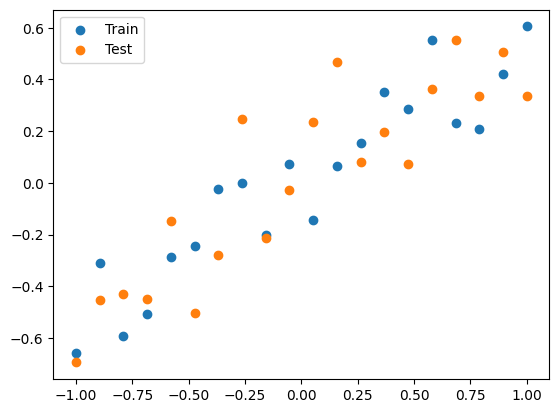

In [9]:
plt.scatter(X_train,y_train,label='Train')
plt.scatter(X_test,y_test,label='Test')
plt.legend()
plt.show()

In [12]:
model = Sequential()

model.add(Input(shape=(1,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.01),metrics=['mean_squared_error'])

history = model.fit(X_train,y_train, epochs=500,validation_data=(X_test,y_test),verbose=0)

In [17]:
#Evaluate Model
_, train_mse = model.evaluate(X_train,y_train,verbose=1)
_, test_mse = model.evaluate(X_test,y_test,verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0036 - mean_squared_error: 0.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0455 - mean_squared_error: 0.0455


In [18]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[-0.5432563 ],
       [-0.5218663 ],
       [-0.5004765 ],
       [-0.47841212],
       [-0.3430176 ],
       [-0.20580405],
       [-0.03763139],
       [-0.00118979],
       [-0.20457643],
       [ 0.07083423],
       [-0.14516872],
       [ 0.0506298 ],
       [ 0.15955453],
       [ 0.3327246 ],
       [ 0.28753898],
       [ 0.5518149 ],
       [ 0.23670916],
       [ 0.21029909],
       [ 0.42156625],
       [ 0.6064888 ]], dtype=float32)

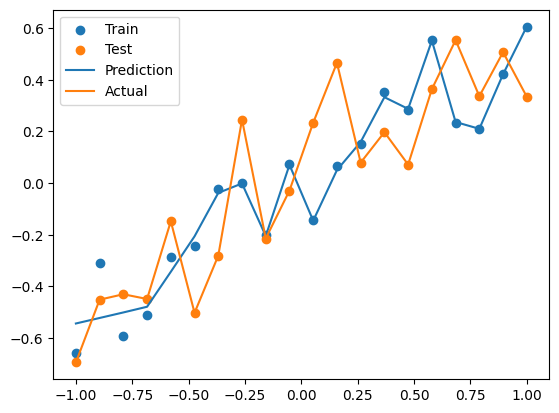

In [19]:
plt.scatter(X_train,y_train,label='Train')
plt.scatter(X_test,y_test,label='Test')
plt.plot(X_test,y_pred,label='Prediction')
plt.plot(X_test,y_test,label='Actual')
plt.legend()
plt.show()

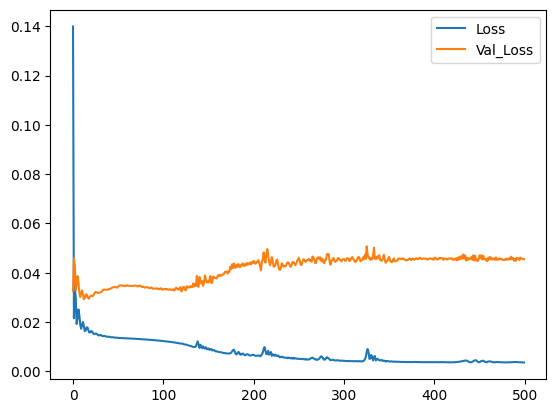

In [14]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val_Loss')
plt.legend()
plt.show()

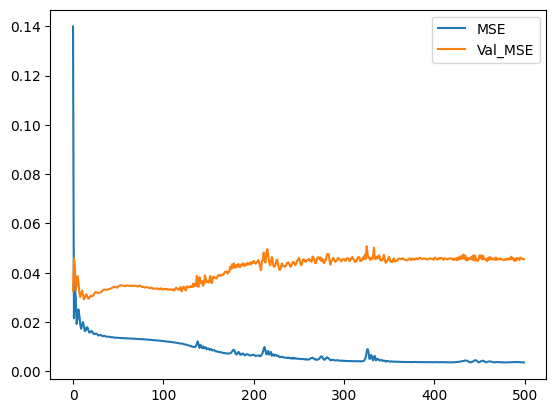

In [16]:
plt.plot(history.history['mean_squared_error'],label='MSE')
plt.plot(history.history['val_mean_squared_error'],label='Val_MSE')
plt.legend()
plt.show()

In [21]:
model_2 = Sequential()
model_2.add(Input(shape=(1,)))
model_2.add(Dense(128,activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500,
                               validation_data = (X_test, y_test),
                               verbose=False)

In [22]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)

In [23]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


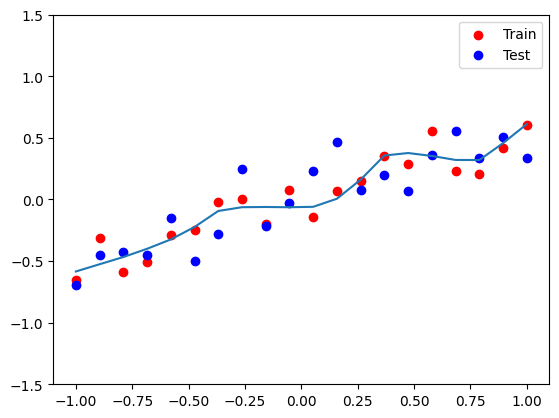

In [24]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()